# Analysis pre-model Visualization

In [1]:
import pandas as pd
import numpy as np
import csv

#Data visualization
import seaborn as sns
sns.set(style="whitegrid")

Se lee el CSV procedente del script de generación del model final, el cual está agrupado por Contaminante e Id único (defunción).

In [2]:
df_model = pd.read_csv('../data/csv/model_csv/df_model_geom.csv', sep=';', encoding= 'utf-8',  compression='gzip', index_col=False)

In [3]:
df_model.shape

(85526, 29)

In [4]:
pd.options.display.max_columns = None

In [5]:
df_model['Id'].nunique()

52806

Vemos todas las variables y su tipo

In [6]:
df_model.dtypes

Unnamed: 0                  int64
Id                          int64
ProvinciaReside             int64
MunicipioReside             int64
Sexo                        int64
AnioCumplidos               int64
TamanioMuniResi             int64
CausaMortaReduc             int64
NivelEstudios               int64
Poblacion                  object
Provincia                  object
Comunidad                  object
Latitud                   float64
Longitud                  float64
Habitantes                  int64
Hombres                     int64
Mujeres                     int64
CodigoPRTR                  int64
LongitudE                 float64
LatitudE                  float64
Contaminante               object
total_anios_Expo_Id         int64
Total_Kg_expo             float64
COD_3                      object
Descripcion_Cod_3          object
target                      int64
geometry_death             object
geometry_focalEmission     object
Distance                    int64
dtype: object

In [7]:
df_model.drop(['Unnamed: 0'], axis=1, inplace=True) #Borramos columnas innecesarias

Comprobamos si alguna columna tiene valores NA para depurarlos

In [8]:
df_model.isnull().any()

Id                        False
ProvinciaReside           False
MunicipioReside           False
Sexo                      False
AnioCumplidos             False
TamanioMuniResi           False
CausaMortaReduc           False
NivelEstudios             False
Poblacion                 False
Provincia                 False
Comunidad                 False
Latitud                   False
Longitud                  False
Habitantes                False
Hombres                   False
Mujeres                   False
CodigoPRTR                False
LongitudE                 False
LatitudE                  False
Contaminante              False
total_anios_Expo_Id       False
Total_Kg_expo             False
COD_3                     False
Descripcion_Cod_3         False
target                    False
geometry_death            False
geometry_focalEmission    False
Distance                  False
dtype: bool

#### Visualizamos las longitudes y latitudes como scatter

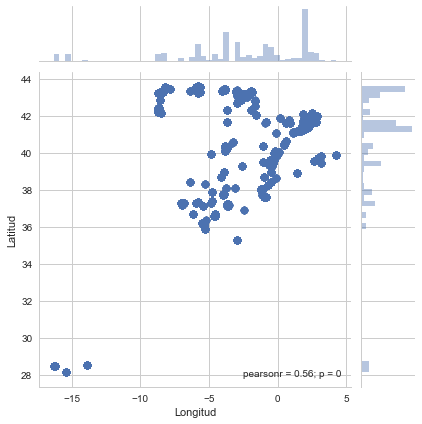

In [9]:
sns.jointplot(data=df_model, x='Longitud', y='Latitud');

Vemos la correlación de las variables numéricas

In [10]:
df_model.corr()

,Id,ProvinciaReside,MunicipioReside,Sexo,AnioCumplidos,TamanioMuniResi,CausaMortaReduc,NivelEstudios,Latitud,Longitud,Habitantes,Hombres,Mujeres,CodigoPRTR,LongitudE,LatitudE,total_anios_Expo_Id,Total_Kg_expo,target,Distance
Id,1.000000,0.030725,0.206728,0.000383,0.026404,0.057509,-0.008348,0.013468,0.170906,0.480627,0.427564,0.429145,0.426083,0.244957,0.481733,0.171167,0.284273,0.057617,0.014602,-0.001108
ProvinciaReside,0.030725,1.000000,0.216063,-0.007930,-0.018454,0.006033,-0.037466,0.000198,-0.066377,-0.376104,-0.227927,-0.226259,-0.229415,0.128335,-0.376236,-0.066528,-0.112325,-0.106982,0.020994,-0.069631
MunicipioReside,0.206728,0.216063,1.000000,-0.008969,-0.005241,-0.126266,-0.001863,-0.004172,0.131970,0.247420,-0.118403,-0.114895,-0.121575,0.009079,0.247231,0.131332,-0.145576,-0.150395,0.006096,0.083088
Sexo,0.000383,-0.007930,-0.008969,1.000000,0.092332,0.035713,0.063787,-0.024359,0.001642,-0.007110,0.029646,0.029467,0.029806,0.011027,-0.007069,0.001633,0.011167,-0.000627,-0.170597,-0.006326
AnioCumplidos,0.026404,-0.018454,-0.005241,0.092332,1.000000,0.019526,0.301329,-0.184525,0.059477,0.039692,0.047931,0.047421,0.048389,0.016653,0.039613,0.059541,0.036974,0.008258,-0.184499,-0.003583
TamanioMuniResi,0.057509,0.006033,-0.126266,0.035713,0.019526,1.000000,-0.000385,0.025932,-0.115240,-0.056587,0.523770,0.525919,0.521762,0.157804,-0.056138,-0.115065,0.306646,0.131631,0.010146,-0.158732
CausaMortaReduc,-0.008348,-0.037466,-0.001863,0.063787,0.301329,-0.000385,1.000000,-0.018496,-0.017041,0.004704,0.018083,0.017911,0.018237,-0.007611,0.004805,-0.017001,0.008567,0.001415,-0.289014,-0.003430
NivelEstudios,0.013468,0.000198,-0.004172,-0.024359,-0.184525,0.025932,-0.018496,1.000000,-0.013092,0.008359,0.024819,0.024878,0.024763,0.023190,0.008414,-0.012998,0.005832,-0.002285,0.013743,-0.000204
Latitud,0.170906,-0.066377,0.131970,0.001642,0.059477,-0.115240,-0.017041,-0.013092,1.000000,0.555287,0.068976,0.065958,0.071708,0.162007,0.554075,0.999966,0.136661,0.015229,-0.002907,0.145412
Longitud,0.480627,-0.376104,0.247420,-0.007110,0.039692,-0.056587,0.004704,0.008359,0.555287,1.000000,0.356749,0.358270,0.355330,0.222259,0.999969,0.555680,0.126995,0.019414,0.000733,0.098257


Debido a que el dataframe es muy pesado, vamos a plotear y explorar los datos para una Comunidad concreta con valores de Distancia al foco contaminante por debajo de un umbral.

In [11]:
df_fil_Comu = df_model[ (df_model['Comunidad'] == 'Andalucía') &  (df_model['Distance'] <= 8000) ]

Ploteamos por la Comunidad en concreto mediante un jointplot y observamos concentraciones en determinadas zonas según la ubicación

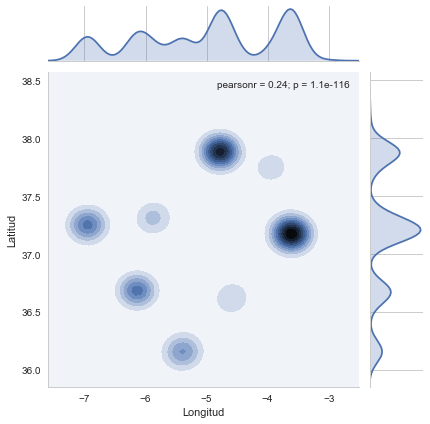

In [12]:
sns.jointplot(x="Longitud", y="Latitud", data=df_fil_Comu, kind='kde');

Vamos a hacer un pairplot con determinadas variables

In [13]:
col = ['Contaminante', 'Latitud', 'Longitud', 'target','total_anios_Expo_Id']
df_fil_Comu1 = df_fil_Comu [col]

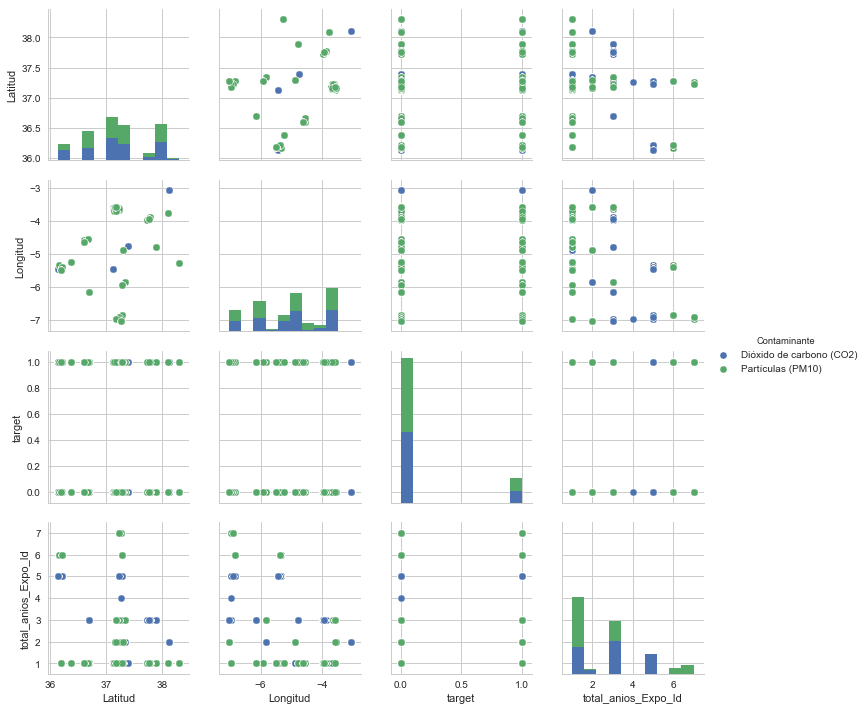

In [14]:
sns.pairplot(df_fil_Comu1, hue='Contaminante', size=2.5);

En el gráfico anterior observamos que para determinadas Latitudes y Longitudes hay agrupaciones de ciertos tipos de enfermedades, igualmente la distribución geográfica parece tener cierta relación con el tipo de Contaminante emitido

Ploteamos el tipo contaminante (var convertida a numérica) y el tipo de enfermedad causante defunción, estas no tienen relación directa pero se observan las modas en cada variable.

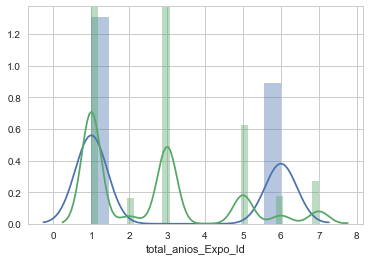

In [15]:
sns.distplot(df_fil_Comu['Sexo'])
sns.distplot(df_fil_Comu['total_anios_Expo_Id']);

Vemos la relación gráfica entre las variables poblaciones de Años cumplidos fecha defun, Nivel estudios y Sexo

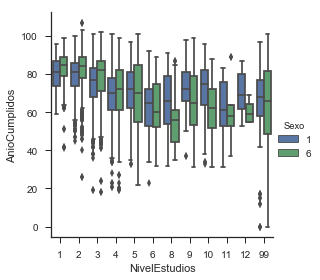

In [16]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("NivelEstudios", "AnioCumplidos", "Sexo", data=df_fil_Comu, kind="box")
    g.set_axis_labels("NivelEstudios", "AnioCumplidos");

Ploteamos en un HeatMap el Contaminante y años exposición de cada persona y contamos las defunciones

In [17]:
mean_Id = df_model.groupby(['total_anios_Expo_Id','Contaminante'])['Id'].count()

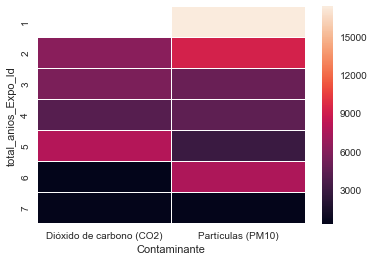

In [18]:
sns.heatmap(mean_Id[:-1][1:].unstack(), linewidths=.1);

Realizamos un clusterMap para ver las correlaciones entre variables

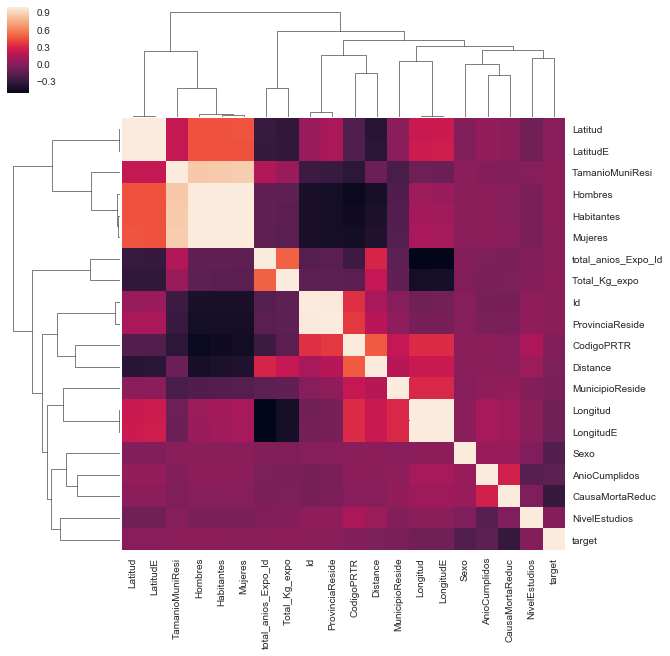

In [19]:
sns.clustermap(df_fil_Comu.corr());

Pudiera haber algo de relación entre el tamaño del municipio de residencia y el total de años de exposición al Contaminante

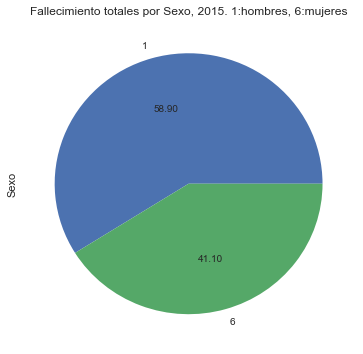

In [20]:
lot = df_model['Sexo'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Fallecimiento totales por Sexo, 2015. 1:hombres, 6:mujeres')

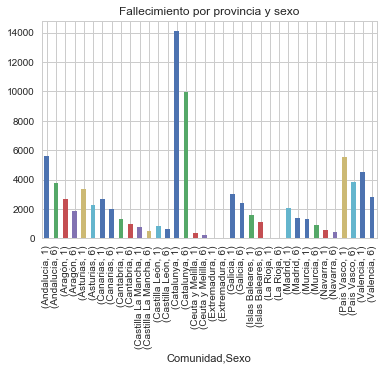

In [21]:
plot = df_model.groupby('Comunidad')['Sexo'].value_counts().plot(kind='bar',
                                            title='Fallecimiento por provincia y sexo')

### Visualización con Folium

In [22]:
#pip install folium
import folium
from folium.plugins import MarkerCluster
import pandas as pd

In [23]:
df_fil_Provincia= df_model[ (df_model['Provincia'] == 'Sevilla')]
df_fil_Provincia.shape

(666, 28)

In [24]:
sevilla_coordinates = [37.3914105, -5.9591776]

Se plotean con folium las Emisiones en rojo y los fallecimientos en azul. Puede observarse que la ubicación de los fallecimientos está georreferenciada por municipio.

In [25]:
colors = {1 : 'red', 6: 'blue'}

map_osm = folium.Map(location=sevilla_coordinates, zoom_start=8)

for _, row in df_fil_Provincia.iterrows():
    folium.CircleMarker(location=[row["LatitudE"], row["LongitudE"]], radius=3, popup="Emission",color='red').add_to(map_osm)
    folium.CircleMarker(location=[row["Latitud"], row["Longitud"]], radius=3,color='blue').add_to(map_osm)

map_osm